### MNIST 딥러닝 모델 예제

- 손으로 쓴 숫자들로 이루어진 이미지 데이터셋
- 기계 학습 분야의 트레이닝 및 테스트에 널리 사용되는 데이터
- keras.datasets에 기본으로 포함되어 있는 데이터셋

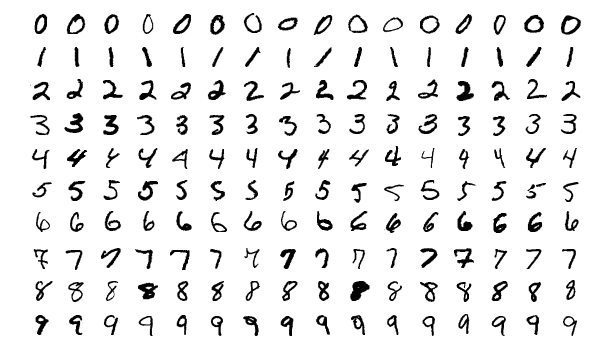

#### 모듈 임포트

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#### 데이터 로드 및 전처리

- MNIST 데이터셋을 로드
- Train Data 중, 30%를 검증 데이터(validation data)로 사용


In [95]:
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz')
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=111)

# random_state 검증, random_state=111 여부에 따른 값 변화 확인
# train_test_split(x_train_full, y_train_full, test_size=0.3)[0][33].sum()

In [96]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

print(f"기존학습데이터 : {x_train_full.shape} 레이블 : {y_train_full.shape}")
print(f"학습데이터 : {x_train.shape} 레이블 : {y_train.shape}")
print(f"검증데이터 : {x_val.shape} 레이블 : {y_val.shape}")
print(f"테스트데이터 : {x_test.shape} 레이블 : {y_test.shape}")

기존학습데이터 : (60000, 28, 28) 레이블 : (60000,)
학습데이터 : (42000, 28, 28) 레이블 : (42000,)
검증데이터 : (18000, 28, 28) 레이블 : (18000,)
테스트데이터 : (10000, 28, 28) 레이블 : (10000,)


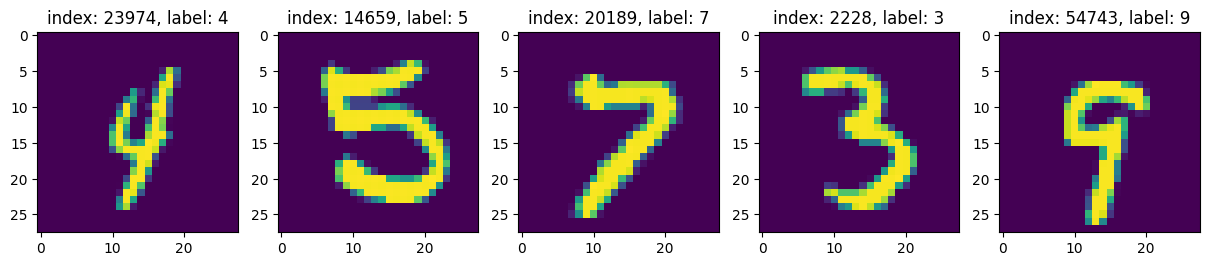

In [97]:
num_sample = 5
random_idx = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15,3))
for idx, i in enumerate(random_idx):
    img = x_train_full[i, :]
    label = y_train_full[i]
    
    plt.subplot(1,len(random_idx), idx+1) # 행 / 열 / 위치
    plt.imshow(img)
    plt.title(f'index: {i}, label: {label}')

In [98]:
# 0 ~ 1 사이 값으로 nomalization (정규화)
# 0 ~ 1 값으로 바꿔주면 학습이 잘됨
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#### 모델 구성(Sequential)

In [ ]:
 
model = Sequential([
    Input(shape=(28,28)),
    Flatten(input_shape = [28,28], name = 'flatten'),
    Dense(100, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,374 (341.30 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

#### 모델 컴파일 및 학습

In [104]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
            metrics=['accuracy'])

In [105]:
history = model.fit(x_train, y_train,
                    epochs = 50,
                    batch_size = 128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7467 - loss: 0.8140 - val_accuracy: 0.9292 - val_loss: 0.2333
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9432 - loss: 0.1954 - val_accuracy: 0.9538 - val_loss: 0.1530
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.1314 - val_accuracy: 0.9559 - val_loss: 0.1394
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1043 - val_accuracy: 0.9636 - val_loss: 0.1167
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0790 - val_accuracy: 0.9656 - val_loss: 0.1105
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9798 - loss: 0.0632 - val_accuracy: 0.9645 - val_loss: 0.1141
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9826 - loss: 0.0567 - val_accuracy: 0.9679 - val_loss: 0.1069
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9866 - loss: 0.0447 - val_accuracy: 0.

In [108]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

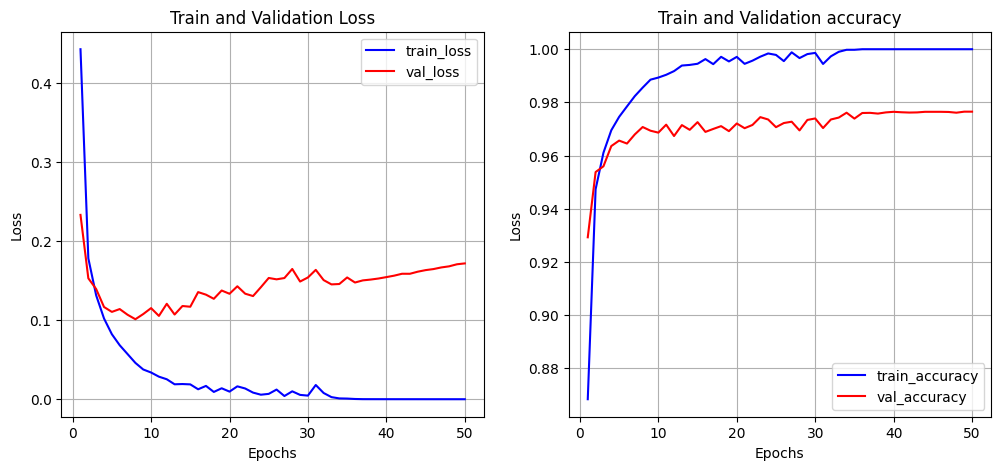

In [109]:
# 기록을 눈으로 보기 편하게 시각화
# history 객체에서 학습 기록을 딕셔너리 형태로 가져옴
# history.history에는 loss, accuracy 등의 지표가 epoch별로 저장되어 있음
history_dict = history.history

# 학습 손실(loss)과 검증 손실(validation loss) 데이터 추출
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# 시각화를 위한 x축 데이터(epochs) 생성. 1부터 시작하여 loss 데이터 길이만큼의 범위 생성
epochs = range(1, len(loss)+1)

# 그래프를 그리기 위한 figure 생성
# figsize로 그래프 크기 지정 (가로 12, 세로 5)
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1, 2, 1) # 행 / 열 / 위치
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')

ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend() 

# 학습 정확도(accuracy)와 검증 정확도(validation accuracy) 데이터 추출
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')

ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

#### 모델 평가 및 예측

In [110]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.9744 - loss: 0.1925


[0.16237415373325348, 0.9783999919891357]

In [114]:
y_pred = model.predict(x_test)
print(y_pred.shape)

print(y_pred[0])
print(np.round(y_pred[0],3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
(10000, 10)
[1.148e-19 1.542e-18 1.598e-15 2.186e-12 3.355e-22 1.069e-22 2.931e-35
 1.000e+00 1.177e-22 1.007e-15]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


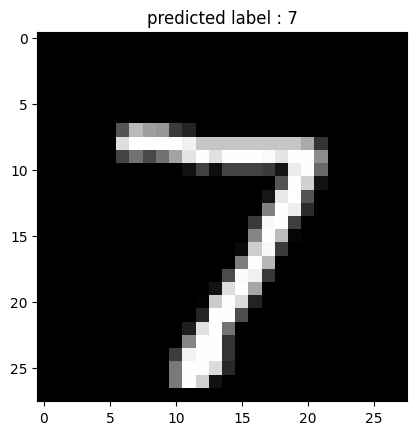

In [126]:
arg_pred_y = np.argmax(y_pred[0])

plt.imshow(x_test[0], cmap='gray')
plt.title(f'predicted label : {arg_pred_y}')
plt.show()

- 혼동 행렬 (Confusion Matrix)

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

In [135]:
np.argmax(y_pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [ ]:
'''
cm: 이것은 히트맵으로 표시할 데이터입니다.
cm은 일반적으로 혼동 행렬을 나타내며, 2차원 배열 형태로 데이터를 포함합니다.

annot (annotation): True로 설정될 경우, 각 셀에 데이터 값이 표시됩니다.
즉, 매트릭스의 각 요소가 그래프에 숫자 형태로 주석으로 추가되어 보다 읽기 쉬운 히트맵을 생성합니다.

fmt ('d'): 주석으로 추가된 데이터의 포맷을 지정합니다.
여기서 'd'는 정수 형식을 의미합니다. 이 옵션은 annot=True일 때 유효하며, 각 셀의 숫자를 정수 형태로 표시하도록 설정합니다.

cmap ('Blues'): 이것은 히트맵에 사용할 컬러 맵을 지정합니다.
'Blues'는 파란색 계열의 컬러 맵을 의미하며, 값이 낮은 영역은 연한 파란색, 값이 높은 영역은 진한 파란색으로 표시됩니다.
Seaborn과 Matplotlib에서 다양한 컬러 맵을 제공하며, 이를 통해 시각적으로 표현의 차이를 뚜렷하게 할 수 있습니다.
'''

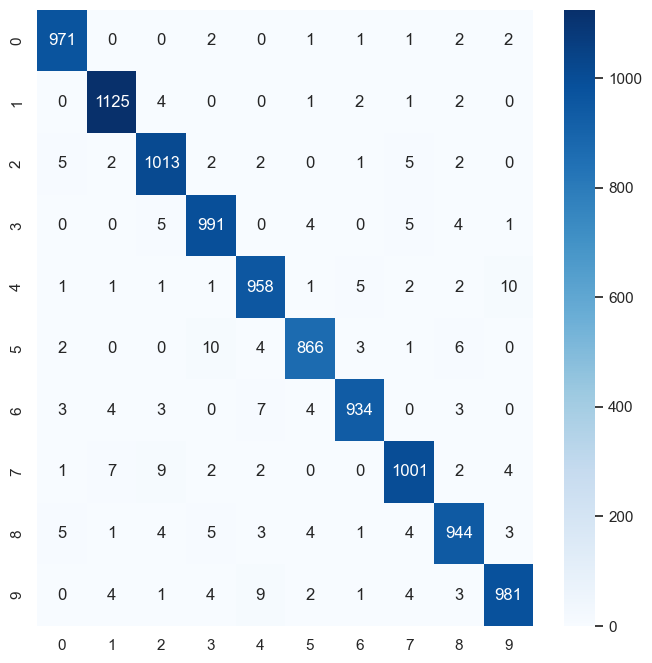

In [145]:
plt.figure(figsize=(8,8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show('True Label')
plt.show()

* 분류 보고서

In [147]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### 모델 저장과 복원

- `save()`
- `load_model()`
- Sequencial API, 함수형 API에서는 모델의 저장 및 로드가 가능하지만 서브클래싱 방식으로는 할 수 없음
- 서브클래싱 방식은 `save_weights()`와 `load_weights()`를 이용해 모델의 파라미터만 저장 및 로드
- custom_objects 옵션에 클래스 정의하여 가능 -> models.load_model('mnist_model.h5', custom_objects={'MyMode': MyModel})

- JSON 형식
  - `model.to_json()` (저장)
  - `tf.keras.models.model_from_json(file_path)` (복원)

- YAML로 직렬화
  - `model.to_yaml()` (저장)
  - `tf.keras.models.model_from_yaml(file_path)` (복원)


In [166]:
model.save('mnist_model.h5')

In [170]:
loaded_model = models.load_model('mnist_model.h5')
loaded_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,376 (341.32 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


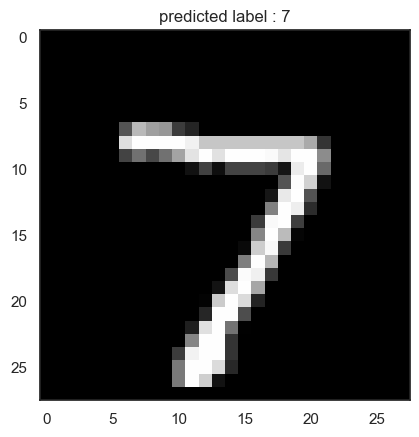

In [171]:
pred_y2 = loaded_model.predict(x_test)
arg_pred_y = np.argmax(pred_y2[0])

plt.imshow(x_test[0], cmap='gray')
plt.title(f'predicted label : {arg_pred_y}')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step


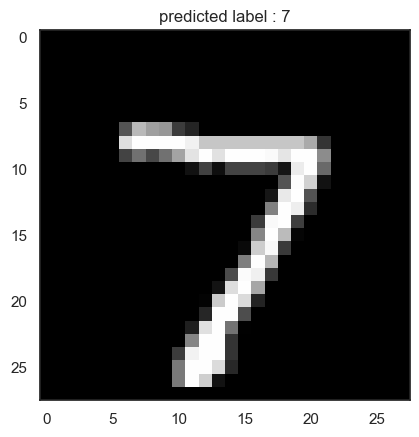

In [186]:
pred_y2 = loaded_model.predict(x_test)
arg_pred_y = np.argmax(pred_y2[0])

plt.imshow(x_test[0], cmap='gray')
plt.title(f'predicted label : {arg_pred_y}')
plt.show()

### 콜백 (Callbacks)

- 모델의 학습 과정에서 특정 지점에서 자동으로 호출되는 함수 또는 작업의 집합
- `fit()` 함수의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음
- 여러 개 사용 가능
- ModelCheckpoint
  - `tf.keras.callbacks.ModelCheckpoint`
  - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용
- EarlyStopping
  - `tf.keras.callbacks.EarlyStopping`
  - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용
- LearningRateSchduler
  - `tf.keras.callbacks.LearningRateSchduler`
  - 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용
- TensorBoard
  - `tf.keras.callbacks.TensorBoard`
  - 모델의 경과를 모니터링할 때 사용


In [187]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler,TensorBoard

#### ModelCheckpoint

In [191]:
check_point_cb = ModelCheckpoint('keras_mnist_model.keras') # 저장할 model의 path 설정, 확장자h5 확인 필요
history = model.fit(x_train, y_train, epochs=10, callbacks=[check_point_cb])

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9882 - loss: 0.0485
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.9900 - loss: 0.0307
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9936 - loss: 0.0195  
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9922 - loss: 0.0239
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.9935 - loss: 0.0188
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 0.9951 - loss: 0.0148
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.9949 - loss: 0.0162
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.9959 - loss: 0.0139
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.9953 - loss: 0.0141
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.9941 - loss: 0.0180


최상의 모델만을 저장: `save_best_only=True`

In [194]:
check_point_cb = ModelCheckpoint('keras_mnist_model.keras', save_best_only=True) # 저장할 model의 path 설정, 확장자h5 확인 필요
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9973 - loss: 0.0087 - val_accuracy: 0.9727 - val_loss: 0.1711
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9963 - loss: 0.0102 - val_accuracy: 0.9758 - val_loss: 0.1526
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9987 - loss: 0.0056 - val_accuracy: 0.9706 - val_loss: 0.1943
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9968 - loss: 0.0089 - val_accuracy: 0.9717 - val_loss: 0.2081
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9974 - loss: 0.0082 - val_accuracy: 0.9734 - val_loss: 0.1849
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9968 - loss: 0.0107 - val_accuracy: 0.9706 - val_loss: 0.2134
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9960 - loss: 0.0132 - val_accuracy: 0.9694 - val_loss: 0.2081
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9970 - loss: 0.0087 - 

#### EarlyStopping

- 일정 `patience` 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤
- 모델이 향상되지 않으면 학습이 자동으로 중지되므로, `epochs` 숫자를 크게 해도 무방
- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요없음

In [199]:
check_point_cb = ModelCheckpoint('keras_mnist_model.keras', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

''' 
restore_best_weights=True 의 의미:
True 설정: 훈련이 조기 종료될 때, 가장 좋은 성능을 보였던 시점의 모델 가중치를 자동으로 복원합니다.
즉, monitor 파라미터로 지정된 메트릭 (예: val_loss)을 기준으로 최소/최대 값을 달성했을 때의 가중치로 모델을 복원합니다.
이는 훈련이 더 이상 성능 개선을 이루지 못하고 종료되더라도, 가장 좋은 상태의 모델을 사용할 수 있도록 보장합니다.

False 설정: 훈련이 종료될 때 현재의 가중치를 그대로 유지합니다.
이 경우, 성능이 가장 좋았던 시점의 가중치로 복원되지 않고,
훈련 중단 시점의 가중치가 모델에 남게 됩니다.
'''

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9967 - loss: 0.0125 - val_accuracy: 0.9726 - val_loss: 0.1946
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9975 - loss: 0.0070 - val_accuracy: 0.9699 - val_loss: 0.2254
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9965 - loss: 0.0126 - val_accuracy: 0.9729 - val_loss: 0.1826
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 0.9737 - val_loss: 0.1836
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9985 - loss: 0.0056 - val_accuracy: 0.9680 - val_loss: 0.2198
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9964 - loss: 0.0115 - val_accuracy: 0.9739 - val_loss: 0.1783
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9982 - loss: 0.0071 - val_accuracy: 0.9745 - val_loss: 0.1892
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9989 - loss: 0.0047 - 

' \nrestore_best_weights=True 의 의미:\nTrue 설정: 훈련이 조기 종료될 때, 가장 좋은 성능을 보였던 시점의 모델 가중치를 자동으로 복원합니다.\n즉, monitor 파라미터로 지정된 메트릭 (예: val_loss)을 기준으로 최소/최대 값을 달성했을 때의 가중치로 모델을 복원합니다.\n이는 훈련이 더 이상 성능 개선을 이루지 못하고 종료되더라도, 가장 좋은 상태의 모델을 사용할 수 있도록 보장합니다.\n\nFalse 설정: 훈련이 종료될 때 현재의 가중치를 그대로 유지합니다.\n이 경우, 성능이 가장 좋았던 시점의 가중치로 복원되지 않고,\n훈련 중단 시점의 가중치가 모델에 남게 됩니다.\n'

#### LearningRateScheduler

* 학습 중에 학습률(learning rate)을 변경시키기 위해 사용

In [232]:
def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        print(type(learning_rate * tf.math.exp(-0.1)))
        return learning_rate * 0.95

In [233]:
round(model.optimizer.learning_rate.numpy(),5)

0.001

In [234]:
lr_scheduler_cb = LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb])

Epoch 1/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.9987 - loss: 0.0049 - learning_rate: 0.0010
Epoch 2/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.9992 - loss: 0.0034 - learning_rate: 0.0010
Epoch 3/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.9993 - loss: 0.0031 - learning_rate: 0.0010
Epoch 4/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.9980 - loss: 0.0096 - learning_rate: 0.0010
Epoch 5/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.9990 - loss: 0.0036 - learning_rate: 0.0010
Epoch 6/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.9987 - loss: 0.0046 - learning_rate: 0.0010
Epoch 7/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.9986 - loss: 0.0063 - learning_rate: 0.0010
Epoch 8/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.9989 - loss: 0.0037 - learning_rate: 0.0010
Epoch 9/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.9986 - loss: 0.005

In [235]:
round(model.optimizer.learning_rate.numpy(),5)

0.00077

#### Tensorboard

- TensorFlow와 Keras에서 사용하는 모델의 훈련 과정을 모니터링하고 디버깅하는 데 유용한 시각화 도구
- 텐서보드를 이용하여 학습과정 모니터링
- 텐서보드를 사용하기 위해 logs 폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성

----- 텐서보드 옵션-----
- histogram_freq: 이 옵션은 몇 번째 에포크마다 히스토그램을 기록할지 설정
- write_graph: 이 설정은 True로 설정되면, 훈련 중에 모델 구조 그래프를 기록하여 TensorBoard에서 볼 수 있습니다. 
- 그래프는 모델의 구조를 시각화해줍니다. 이는 모델의 구조를 이해하거나 문제를 진단하는 데 도움을 줄 수 있습니다.
- write_images: True일 경우 에포크마다 가중치를 이미지로 기록. 가중치가 어떻게 변화하는지 시각적으로 분석할 수 있는 기능

In [ ]:
log_dir = '\\logs' # 파일 경로 한글 없게
tensor_board_cb = [TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_val, y_val),
                    callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 0.9769 - val_loss: 0.2594
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9754 - val_loss: 0.2795
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9997 - loss: 9.3488e-04 - val_accuracy: 0.9766 - val_loss: 0.3055
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9751 - val_loss: 0.3416
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9986 - loss: 0.0056 - val_accuracy: 0.9769 - val_loss: 0.2949
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9743 - val_loss: 0.3046
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9749 - val_loss: 0.2963
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9994 - loss: 0.003

In [ ]:
%load_ext tensorboard # 코랩의 경우
%tensorboard --logdir {log_dir}

* 텐서보드 load가 안된다면 port 번호를 바꿔서 실행
`%tensorboard --logdir {log_dir} port 8000`

In [268]:
# 로컬
!tensorboard --logdir="c:\\Users\\rlaal\\OneDrive\\logs" --port=8000

2024-10-21 02:31:21.254627: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-21 02:31:22.096791: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BO

# 딥러닝 학습 기술


## IMDB 딥러닝 모델 예제

* 영화 사이트 IMDB의 리뷰 데이터
* 텍스트 분류, 감성 분류를 위해 자주 사용하는 데이터
* 리뷰 텍스트와 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블
* 케라스에서는 IMDB 영화 리뷰 데이터를 `imdb.load_data()` 함수를 통해 다운로드 가능

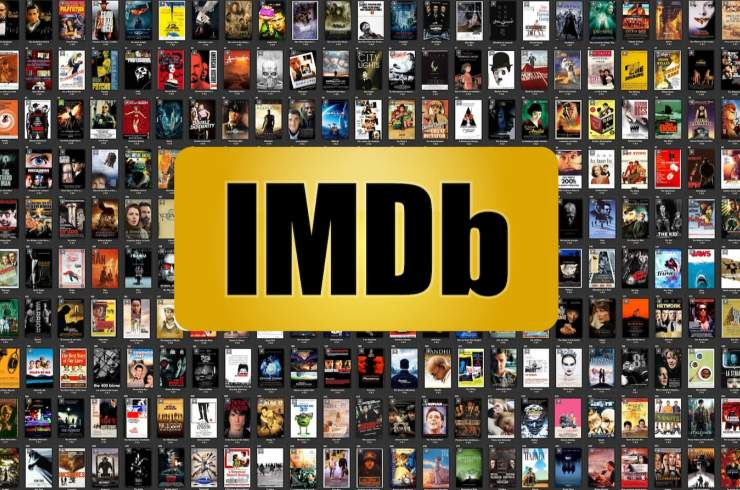

In [6]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [7]:
# num_words=10000 데이터셋에서 가장 빈번하게 등장하는 상위 10,000개의 단어만을 포함하도록 제한
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

In [8]:
# train_data의 숫자 자리를 1, 아닌곳 0

def vectorize_seq(seqs, dim=10000):
    '''
    각 리뷰(단어의 시퀀스)를 원-핫 인코딩 방식으로 벡터화합니다.
    원-핫 인코딩은 단어의 인덱스에 해당하는 위치의 값을 1로 설정하고,
    나머지는 0으로 설정하는 벡터 표현 방법입니다.
    '''
    
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs): 
        results[i,seq] = 1
    return results

In [9]:
x_train = vectorize_seq(train_data)
x_test= vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
 
model = Sequential([
    Dense(16, input_shape = (10000,), name = 'input'),
    Dense(16, activation='relu', name = 'hidden'),
    Dense(1, activation='sigmoid',name = 'output')])

model.compile(optimizer='adam',
            loss = 'binary_crossentropy',
            metrics=['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.optimizer.learning_rate = 0.0001
model_hist = model.fit(x_train, y_train,
                       epochs=20,
                       batch_size = 64,
                       validation_data=(x_test, y_test) )

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.6973 - loss: 0.6106 - val_acc: 0.8600 - val_loss: 0.3992
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8852 - loss: 0.3409 - val_acc: 0.8816 - val_loss: 0.3086
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9185 - loss: 0.2442 - val_acc: 0.8879 - val_loss: 0.2833
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9336 - loss: 0.2010 - val_acc: 0.8892 - val_loss: 0.2772
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9405 - loss: 0.1782 - val_acc: 0.8861 - val_loss: 0.2810
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9466 - loss: 0.1590 - val_acc: 0.8853 - val_loss: 0.2882
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9571 - loss: 0.1382 - val_acc: 0.8826 - val_loss: 0.2999
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9631 - loss: 0.1204 - val_acc: 0.8775 - val_loss: 0.3185
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a

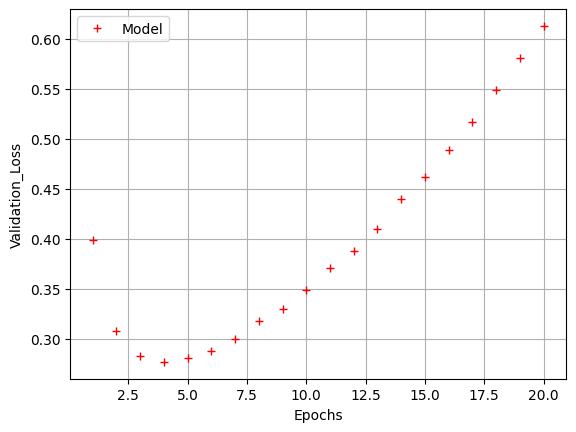

In [13]:
import matplotlib.pyplot as plt

epochs = range(1,21)
model_val_loss = model_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.xlabel('Epochs')
plt.ylabel('Validation_Loss')
plt.legend()
plt.grid()
plt.show()

## 과소적합(Underfitting) / 과대적합(Overfitting)

<img src = https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png>

### 과소적합 (Underfitting)

- 학습 데이터를 충분히 학습하지 않아 성능이 매우 안 좋은 경우
- 모델이 지나치게 단순한 경우
- 해결 방안
  - 충분한 학습 데이터 수집
  - 보다 더 복잡한 모델 사용
  - 에폭수(epochs)를 늘려 충분히 학습

### 과대적합 (Overfitting)

- 모델이 학습 데이터에 지나치게 맞추어진 상태
- 새로운 데이터에서는 성능 저하
- 데이터에는 잡음이나 오류가 포함
- 학습 데이터가 매우 적을 경우
- 모델이 지나치게 복잡한 경우
- 학습 횟수가 매우 많을 경우
- 해결방안
  - 다양한 학습 데이터 수집 및 학습
  - 모델 단순화: 파라미터가 적은 모델을 선택하거나, 학습 데이터의 특성 수를 줄임
  - 정규화(Regularization)을 통한 규칙 단순화
  - 적정한 하이퍼 파라미터 찾기

### 과대적합(overfitting)과 과소적합(underfitting) 방지 방법

* 모델의 크기 축소
* 가중치 초기화(Weight Initializer)
* 옵티마이저(Optimizer)
* 배치 정규화(Batch Normalization)
* 규제화(Regularization)
* 드롭아웃(Dropout)

## 모델 크기 조절

- 가장 단순한 방법
- 모델의 크기를 줄인다는 것은 학습 파라미터의 수를 줄이는 것


### 모델 크기 감소

In [ ]:
 
model_s = Sequential([
    Dense(7, input_shape = (10000,), name = 'input'),
    Dense(7, activation='relu', name = 'hidden'),
    Dense(1, activation='sigmoid',name = 'output')])

model_s.compile(optimizer='adam',
            loss = 'binary_crossentropy',
            metrics=['acc'])
model_s.summary()

c:\Users\rlaal\anaconda3\envs\py39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 7)              │        70,007 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,071 (273.71 KB)

 Trainable params: 70,071 (273.71 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_s.optimizer.learning_rate = 0.0001
model_s_hist = model_s.fit(x_train, y_train,
                       epochs=20,
                       batch_size = 64,
                       validation_data=(x_test, y_test) )

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.6636 - loss: 0.6506 - val_acc: 0.8339 - val_loss: 0.5109
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8666 - loss: 0.4570 - val_acc: 0.8669 - val_loss: 0.3952
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8919 - loss: 0.3462 - val_acc: 0.8784 - val_loss: 0.3369
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9083 - loss: 0.2832 - val_acc: 0.8838 - val_loss: 0.3073
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9148 - loss: 0.2512 - val_acc: 0.8876 - val_loss: 0.2901
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9226 - loss: 0.2241 - val_acc: 0.8885 - val_loss: 0.2828
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9316 - loss: 0.1982 - val_acc: 0.8888 - val_loss: 0.2789
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9339 - loss: 0.1896 - val_acc: 0.8885 - val_loss: 0.2776
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

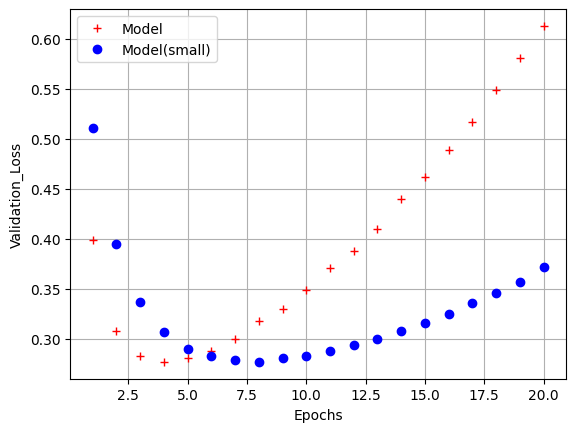

In [16]:
import matplotlib.pyplot as plt

epochs = range(1,21)
model_s_val_loss = model_s_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, model_s_val_loss, 'bo', label='Model(small)')
plt.xlabel('Epochs')
plt.ylabel('Validation_Loss')
plt.legend()
plt.grid()
plt.show()

### 모델 크기 증가

In [ ]:
 
model_b = Sequential([
    Dense(128, input_shape = (10000,), name = 'input'),
    Dense(128, activation='relu', name = 'hidden'),
    Dense(1, activation='sigmoid',name = 'output')])

model_b.compile(optimizer='adam',
            loss = 'binary_crossentropy',
            metrics=['acc'])
model_b.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,296,769 (4.95 MB)

 Trainable params: 1,296,769 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_b.optimizer.learning_rate = 0.0001
model_b_hist = model_b.fit(x_train, y_train,
                       epochs=20,
                       batch_size = 64,
                       validation_data=(x_test, y_test) )

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - acc: 0.7663 - loss: 0.5186 - val_acc: 0.8875 - val_loss: 0.2858
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.9253 - loss: 0.2100 - val_acc: 0.8857 - val_loss: 0.2887
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.9443 - loss: 0.1578 - val_acc: 0.8791 - val_loss: 0.3134
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.9605 - loss: 0.1205 - val_acc: 0.8696 - val_loss: 0.3626
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.9664 - loss: 0.1010 - val_acc: 0.8686 - val_loss: 0.3954
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - acc: 0.9749 - loss: 0.0801 - val_acc: 0.8652 - val_loss: 0.4453
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - acc: 0.9808 - loss: 0.0698 - val_acc: 0.8593 - val_loss: 0.5088
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.9854 - loss: 0.0536 - val_acc: 0.8549 - val_loss: 0.5712
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/

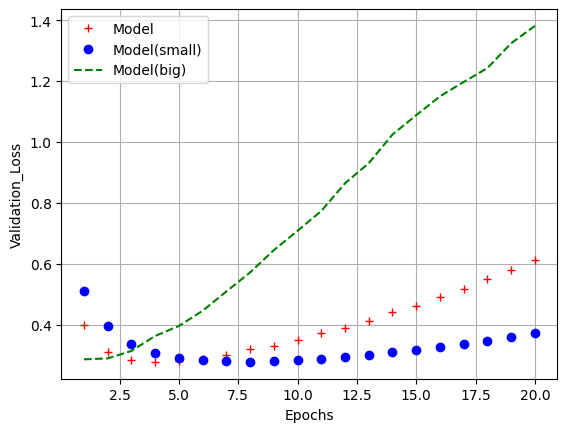

In [19]:
import matplotlib.pyplot as plt

epochs = range(1,21)
model_b_val_loss = model_b_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, model_s_val_loss, 'bo', label='Model(small)')
plt.plot(epochs, model_b_val_loss, 'g--', label='Model(big)')
plt.xlabel('Epochs')
plt.ylabel('Validation_Loss')
plt.legend()
plt.grid()
plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터 손실을 통해 확인 가능

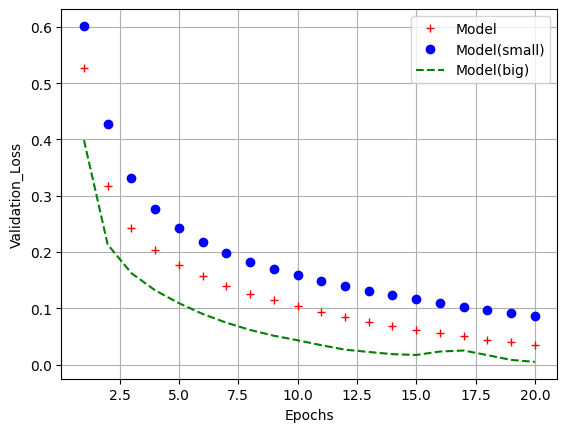

In [20]:
model_train_loss = model_hist.history['loss']
model_s_train_loss = model_s_hist.history['loss']
model_b_train_loss = model_b_hist.history['loss']

import matplotlib.pyplot as plt

epochs = range(1,21)
model_b_val_loss = model_b_hist.history['val_loss']

plt.plot(epochs, model_train_loss, 'r+', label='Model')
plt.plot(epochs, model_s_train_loss, 'bo', label='Model(small)')
plt.plot(epochs, model_b_train_loss, 'g--', label='Model(big)')
plt.xlabel('Epochs')
plt.ylabel('Validation_Loss')
plt.legend()
plt.grid()
plt.show()

## 옵티마이저(Optimizer)

### 확률적 경사하강법(Stochastic Gradient Descent, SGD)

* 전체를 한번에 계산하지 않고, **확률적**으로 일부 샘플을 뽑아 조금씩 나누어 학습을 시키는 과정  
* 반복할 때마다 다루는 데이터의 수가 적기때문에 한 번 처리하는 속도는 빠름  
* 한 번 학습할 때 필요한 메모리만 있으면 되므로 매우 큰 데이터셋에 대해서도 학습이 가능
* 확률적이기 때문에, 배치 경사하강법보다 불안정
* 손실함수의 최솟값에 이를 때까지 다소 위아래로 요동치면서 이동
* 따라서, 위와 같은 문제 때문에 **미니 배치 경사하강법**(mini-batch gradient descent)로 학습을 진행
* 요즘에는 보통 SGD라고하면 미니 배치 경사하강법을 의미하기도 함
* SGD의 단점: 단순하지만 문제에 따라서 시간이 매우 오래걸림
* SGD 수식

  $\quad W \leftarrow W - \gamma \frac{\partial L}{\partial W}$  
   - $\gamma :\ $ 학습률

  





In [ ]:
# 배치 경사하강법: 전체 데이터를 사용하여 1 에포크에 1번 업데이트.
# 미니배치 경사하강법: 지정된 배치 크기만큼의 데이터를 사용하여 1 에포크에 여러 번 업데이트.
# SGD: 각 업데이트마다 1개의 데이터 샘플을 사용. 1 에포크에 데이터 수만큼 업데이트.

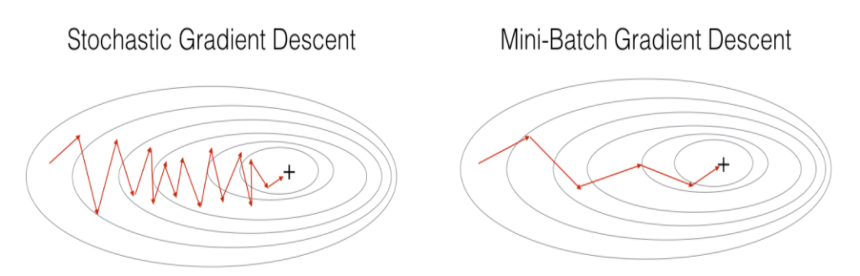

### Momentum

- 운동량을 의미, 관성과 관련
- 이전 단계에서의 업데이트 방향을 참고하여 현재 단계의 파라미터 업데이트에 일종의 관성을 부여하는 방법
- 공이 그릇의 경사면을 따라서 내려가는 듯한 모습 (가속도를 받아 점점 빠르게 이동하는 것처럼 파라미터 업데이트도 가속)
- 이전의 속도를 유지하려는 성향
- 경사하강을 좀 더 유지하려는 성격을 지님
- 단순히 SGD만 사용하는 것보다 적게 방향이 변함
* Momentum 수식

  $
  \qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \ v
  $
  - $\alpha\ $ : 관성계수
  - $v$ :  속도
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분




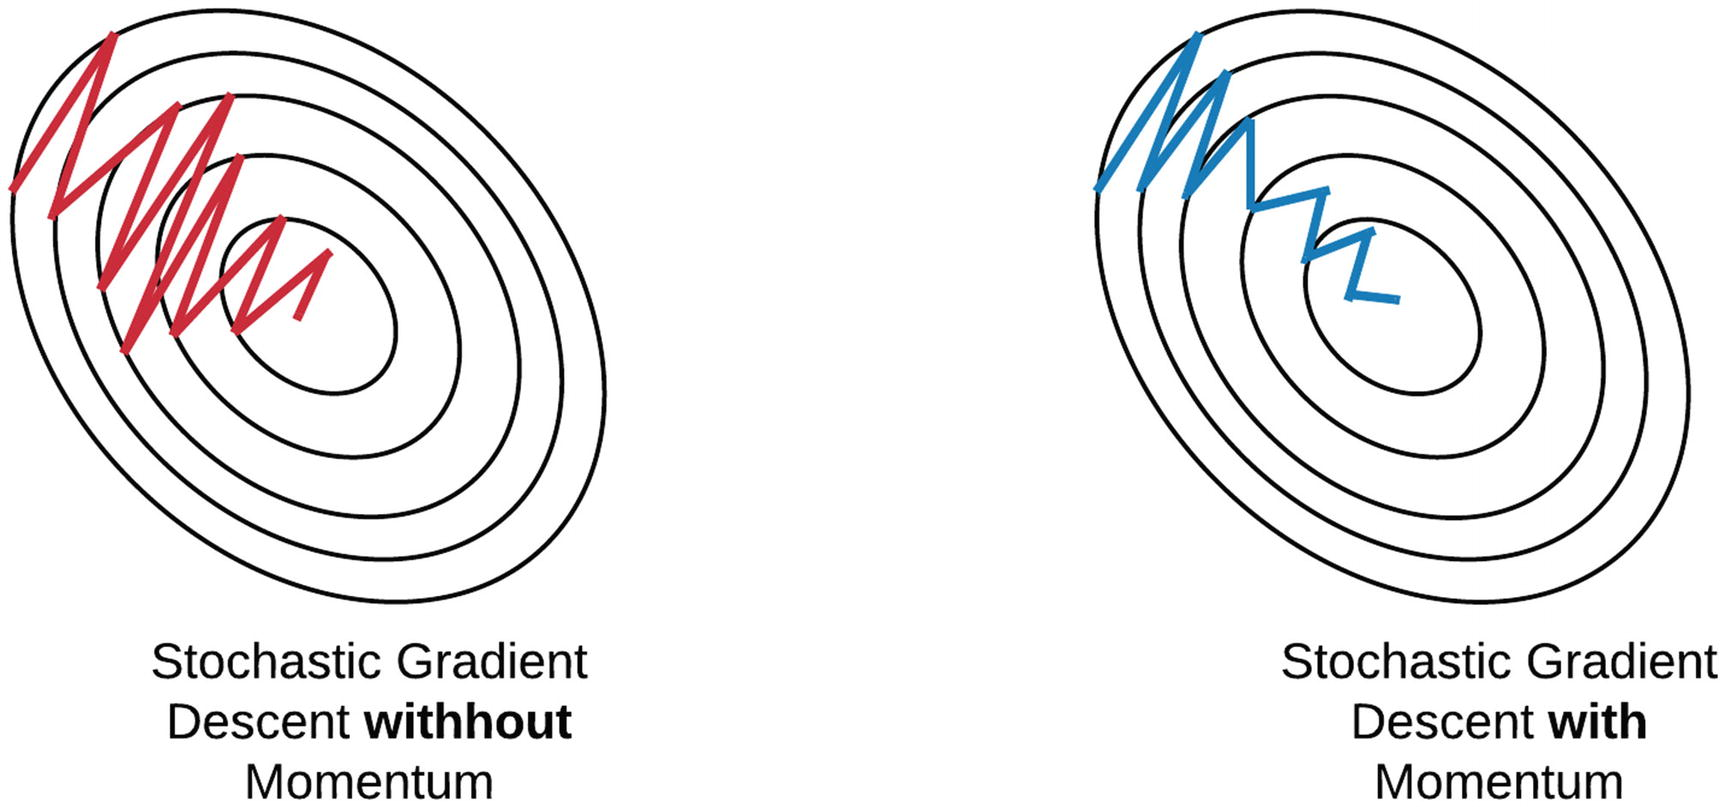

In [26]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.001, momentum=0.9)

### Nesterov

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함
- 시간이 지날수록 조금 더 빨리 최솟값에 도달
- Nesterov 수식

  $
  \qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
  \qquad \theta \ \leftarrow \ \theta \ + m
  $

  - $h\ $ : 기존 기울기를 제곱하여 더한 값
  - $\eta\ $ : 학습률
  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

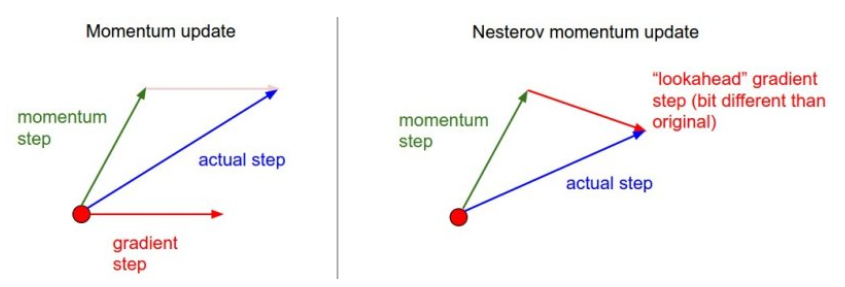

In [21]:

import tensorflow as tf
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

### AdaGrad(Adaptive Gradient)

- 가장 가파른 경사를 따라 빠르게 하강하는 방법
- 학습률을 변화시키며 진행하며 적응적 학습률이라고도 부름
- 경사가 급할 때는 빠르게 변화, 완만할 때는 느리게 변화
- 간단한 문제에서는 좋을 수는 있지만 딥러닝(Deep Learning)에서는 자주 쓰이지 않음
- 학습률이 너무 감소되어 전역최소값(global minimum)에 도달하기 전에 학습이 빨리 종료될 수 있기 때문
- AdaGrad 수식

  $
  \qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
  $
  - $h\ $ : 기존 기울기를 제곱하여 더한 값
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분
  - 과거의 기울기를 제곱하여 계속 더해하기 때문에 학습을 진행할수록 갱신 강도가 약해짐 ($\because \frac{1}{\sqrt h}$)    
  

In [22]:
from tensorflow.keras.optimizers import Adagrad
optimizer = Adagrad(learning_rate = 0.001)

### RMSProp (Root Mean Square Propagation)

- AdaGrad를 보완하기 위한 방법으로 등장
- 합 대신 지수의 평균값을 활용
- 학습이 안되기 시작하면 학습률이 커져서 잘 되게하고, 학습률이 너무 크면 학습률을 다시 줄임
- RMSProp 수식

  $
  \qquad h \ \leftarrow \  \rho \ h + (1 - \rho)\ \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \gamma \frac{\partial L}{\partial W} / \ \sqrt{h + \epsilon}
  $
  - $h\ $ : 기존 기울기를 제곱하여 업데이트 계수를 곱한 값과 업데이트 계수를 곱한 값을 더해줌
  - $\rho\ $ : 지수 평균의 업데이트 계수
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [29]:
# RMSProp 최적화 알고리즘의 하이퍼파라미터 설명
# learning_rate: 학습률 (기본값 = 0.001)
# rho: 이전 기울기의 이동 평균을 계산하는 데 사용되는 감쇠율 (기본값 = 0.9)
# epsilon: 분모가 0이 되는 것을 방지하기 위한 작은 상수 (기본값 = 1e-7)
# momentum: 모멘텀 계수 (기본값 = 0.0)
# centered: True일 경우 RMSProp의 centered 버전 사용 (기본값 = False)

from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate = 0.001, rho=0.9) # rho : 지수 평균의 업데이트 계수

### Adam (Adaptive Moment Estimation)

- 모멘텀 최적화와 RMSProp의 아이디어를 합친 것
- 지난 그래디언트의 지수 감소 평균을 따르고(Momentum), 지난 그레디언트 제곱의 지수 감소된 평균(RMSProp)을 따름
- 가장 많이 사용되는 최적화 방법
- Adam 수식

  $
  \qquad t \ \leftarrow \ t + 1 \\
  \qquad m_t \ \leftarrow \  \beta_1 \ m_{t-1} - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
  \qquad v_t \ \leftarrow \ \beta_2 \ v_{t-1} + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad \hat{m_t} \ \leftarrow \frac{m_t}{1 - \beta_1^t} \\
  \qquad \hat{v_t} \ \leftarrow \frac{v_t}{1 - \beta_2^t} \\
  \qquad W_t \ \leftarrow \ W_{t-1} \ + \gamma \ \hat{m_t}\  / \sqrt{\hat{v_t} + \epsilon}
  $
  - $\beta\ $ : 지수 평균의 업데이트 계수
  - $\gamma\ $ : 학습률
  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [30]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999) # rho : 지수 평균의 업데이트 계수

### 최적화 Optimizer 비교

<img src="https://user-images.githubusercontent.com/11681225/50016682-39742a80-000d-11e9-81da-ab0406610b9c.gif" width="700">

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

## 가중치 초기화(Weights Initialization)

* 가중치 초기화 시각화: https://www.deeplearning.ai/ai-notes/initialization/

### 가중치 소실(Gradient Vanishing)

- 활성화함수가 Sigmoid 함수 일 때, 은닉층의 갯수가 늘어 날수록 가중치가 역전파되면서 가중치 소실문제 발생
  - 시그모이드 함수의 미분값(0~1)사이 값이 거듭 곱해지면서 기울기가 출력층과 멀어질수록 미분값이 작아짐
  - 이는 <u>미분값이 점점 0에 가까워짐</u>을 의미하기도 함
  - **ReLU 함수 등장(비선형 함수)**

- 가중치 초기화 문제(은닉층의 활성화값 분포)
  - 가중치의 값이 일부 값으로 치우치게 되면, 활성화 함수를 통과한 값이 치우치게 되고, 표현할 수 있는 신경망의 수가 적어짐
  - 따라서, 활성화값이 골고루 분포되는 것이 중요

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FyJnMy%2FbtrCKh4ojvw%2FLtlaMwrtEZHC3KtGNWvuLK%2Fimg.png'>

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F278186%2Fd158ec3585bc1551d9f3a03ae13a3a73%2Fvanishing%20gradient%20problem.png?generation=1574233763365617&alt=media)

###  선형 함수에서 가중치 초기화

# 가중치 초기화의 중요성

- 가중치 초기화는 딥러닝 모델의 학습 성능에 큰 영향을 미치는 중요한 요소입니다
- 잘못된 가중치 초기화는 다음과 같은 문제를 일으킬 수 있습니다:
  - 기울기 소실(Gradient Vanishing) 또는 폭주(Exploding) 문제 발생
  - 학습 속도 저하
  - 모델이 제대로 수렴하지 못함

주요 가중치 초기화 방법:
1. 0으로 초기화
  - 모든 뉴런이 동일한 출력을 내어 학습이 제대로 이루어지지 않음
  - 실제로는 거의 사용되지 않음

2. 랜덤 초기화
  - 무작위로 작은 값을 할당
  - 간단하지만 깊은 신경망에서는 문제가 발생할 수 있음

3. Xavier/Glorot 초기화
  - sigmoid, tanh 활성화 함수에 적합
  - 입력과 출력 노드 수를 고려하여 초기화

4. He 초기화
  - ReLU 계열 활성화 함수에 적합
  - 입력 노드 수만 고려하여 초기화
  - 현대 딥러닝에서 가장 많이 사용되는 방식

적절한 가중치 초기화는 모델의 빠른 수렴과 좋은 성능을 위해 매우 중요합니다.


## 배치 정규화 (Batch Normalization)

- 모델에 주입되는 샘플들을 균일하게 만드는 방법
- 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용시키는 것
- 미니배치 단위로 데이터의 평균이 0, 표준편차가 1로 정규화
- 학습을 빨리 진행할 수 있음
- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌
- 초기값에 크게 의존하지 않아도 됨
- 과대적합 방지
- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음
- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임

![](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2018-01-23-at-2.27.20-PM.png)

## 규제화(Regularization) - 가중치 감소

- 과대적합(Overfitting, 오버피팅)을 방지하는 방법 중 하나
- 과대적합은 가중치의 매개변수 값이 커서 발생하는 경우가 많음  
  이를 방지하기 위해 **큰 가중치 값에 큰 규제를 가하는 것**
- 규제란 가중치의 절댓값을 가능한 작게 만드는 것으로, 가중치의 모든 원소를 0에 가깝게 하여 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것(기울기를 작게 만드는 것)을 의미
- 가중치의 분포가 더 균일하게 됨
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 함
- 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미
- 적절한 규제값을 찾는 것이 중요

- 네트워크 손실함수에 큰 가중치와 연관된 비용을 추가
  - L1 규제: 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제: 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 두 규제가 합쳐진 경우도 존재


### L2 규제

- 가중치의 제곱합
- 손실 함수일정 값을 더함으로써 과적합을 방지
- $\lambda$ 값이 크면 가중치 감소가 커지고, 작으면 가하는 규제가 적어진다.
- 더 Robust한 모델을 생성하므로 L1보다 많이 사용됨

  $\qquad Cost = \frac{1}{n} \sum{^n}_{i=1} {L(y_i, \hat{y_i}) + \frac{\lambda}{2}w^2}$

  $\quad L(y_i, \hat{y_i})$ : 기존 Cost Function

In [25]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

l2_model =  Sequential([Dense(16, kernel_regularizer=l2(0.001), activation='relu', input_shape=(10000,)),
                        Dense(16, kernel_regularizer=l2(0.001), activation='relu'),
                        Dense(1, activation='relu')])
l2_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
l2_model.summary()

plot_model(l2_model, show_shapes= True)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
l2_model_hist = l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - acc: 0.6195 - loss: 1.1389 - val_acc: 0.8515 - val_loss: 0.4708
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.8906 - loss: 0.3756 - val_acc: 0.8719 - val_loss: 0.4776
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.9220 - loss: 0.3026 - val_acc: 0.8650 - val_loss: 0.6070
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9390 - loss: 0.2672 - val_acc: 0.8688 - val_loss: 0.7094
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9469 - loss: 0.2527 - val_acc: 0.8731 - val_loss: 0.6746
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9605 - loss: 0.2319 - val_acc: 0.8571 - val_loss: 0.8224
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9652 - loss: 0.2242 - val_acc: 0.8745 - val_loss: 0.7368
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9697 - loss: 0.2041 - val_acc: 0.8601 - val_loss: 0.9735
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.9666

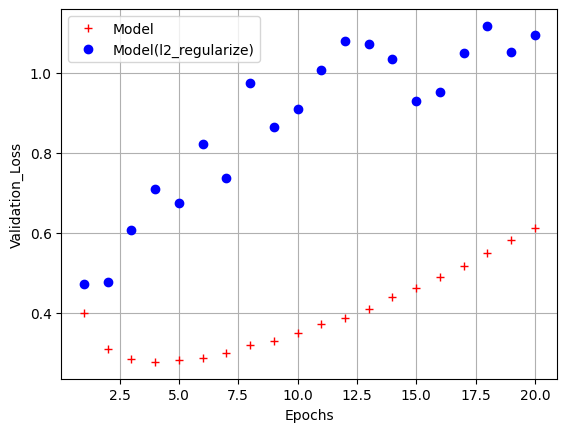

In [26]:
import matplotlib.pyplot as plt
epochs = range(1,21)
model_val_loss = model_hist.history['val_loss']
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Model(l2_regularize)')
plt.xlabel('Epochs')
plt.ylabel('Validation_Loss')
plt.legend()
plt.grid()
plt.show()

### L1 규제

- 가중치의 절대값합
- L2 규제와 달리 어떤 가중치는 0이 되는데 이는 모델이 가벼워짐을 의미

  $\qquad Cost = \frac{1}{n} \sum{^n}_{i=1} {L(y_i, \hat{y_i}) + \frac{\lambda}{2}|w|}$

  $\quad L(y_i, \hat{y_i})$ : 기존 Cost Function

In [28]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

l1_model =  Sequential([Dense(16, kernel_regularizer=l1(0.0001), activation='relu', input_shape=(10000,)),
                        Dense(16, kernel_regularizer=l1(0.0001), activation='relu'),
                        Dense(1, activation='relu')])
l1_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
l1_model.summary()

plot_model(l1_model, show_shapes= True)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
l1_model_hist = l1_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - acc: 0.6668 - loss: 0.9749 - val_acc: 0.8598 - val_loss: 0.5532
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.8981 - loss: 0.4217 - val_acc: 0.8712 - val_loss: 0.4843
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9207 - loss: 0.3406 - val_acc: 0.8674 - val_loss: 0.5072
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9268 - loss: 0.3240 - val_acc: 0.8785 - val_loss: 0.5719
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9398 - loss: 0.2952 - val_acc: 0.8329 - val_loss: 0.7560
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9373 - loss: 0.2952 - val_acc: 0.8701 - val_loss: 0.6519
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9491 - loss: 0.2649 - val_acc: 0.8672 - val_loss: 0.8465
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9519 - loss: 0.2617 - val_acc: 0.8752 - val_loss: 0.7189
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9608

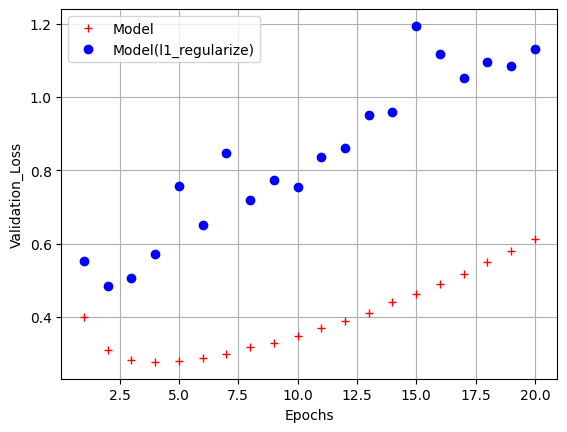

In [30]:
epochs = range(1,21)
model_val_loss = model_hist.history['val_loss']
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model(l1_regularize)')
plt.xlabel('Epochs')
plt.ylabel('Validation_Loss')
plt.legend()
plt.grid()
plt.show()

### L1 L2 규제

In [31]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

l1_l2_model =  Sequential([Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation='relu', input_shape=(10000,)),
                           Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation='relu'),
                           Dense(1, activation='sigmoid')])

l1_l2_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
l1_l2_model.summary()

plot_model(l1_l2_model, show_shapes= True)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.7163 - loss: 0.7340 - val_acc: 0.8803 - val_loss: 0.4520
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.8981 - loss: 0.4003 - val_acc: 0.8698 - val_loss: 0.4016
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9076 - loss: 0.3374 - val_acc: 0.8869 - val_loss: 0.3623
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9084 - loss: 0.3187 - val_acc: 0.8828 - val_loss: 0.3671
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9136 - loss: 0.3091 - val_acc: 0.8850 - val_loss: 0.3630
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9169 - loss: 0.2990 - val_acc: 0.8856 - val_loss: 0.3611
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9212 - loss: 0.2912 - val_acc: 0.8716 - val_loss: 0.3936
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9246 - loss: 0.2853 - val_acc: 0.8750 - val_loss: 0.3913
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9265

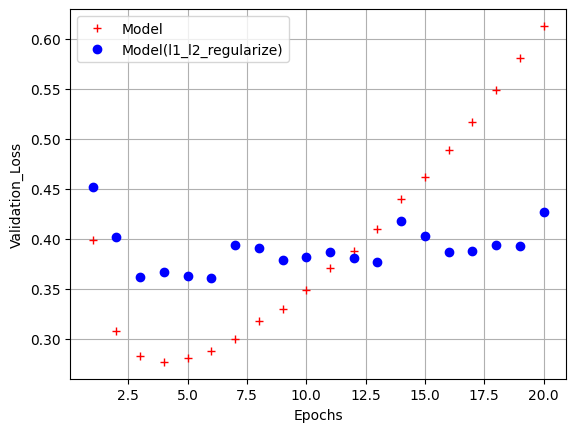

In [33]:
epochs = range(1,21)
model_val_loss = model_hist.history['val_loss']
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, l1_l2_model_val_loss, 'bo', label='Model(l1_l2_regularize)')
plt.xlabel('Epochs')
plt.ylabel('Validation_Loss')
plt.legend()
plt.grid()
plt.show()

* 규제 방법 비교

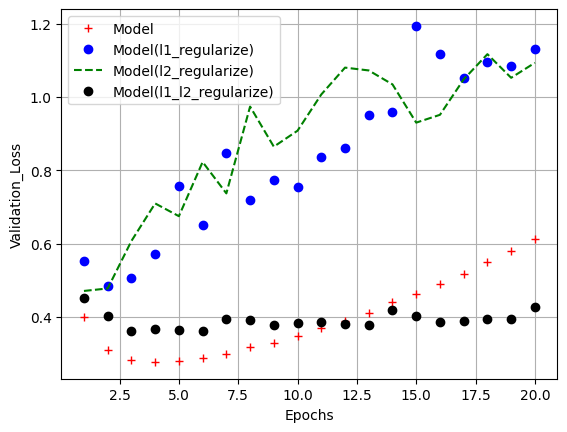

In [34]:
epochs = range(1,21)
model_val_loss = model_hist.history['val_loss']
l1_model_val_loss = l1_model_hist.history['val_loss']
l2_model_val_loss = l2_model_hist.history['val_loss']
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model(l1_regularize)')
plt.plot(epochs, l2_model_val_loss, 'g--', label='Model(l2_regularize)')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label='Model(l1_l2_regularize)')
plt.xlabel('Epochs')
plt.ylabel('Validation_Loss')
plt.legend()
plt.grid()
plt.show()

## 드롭아웃(Dropout)

- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법
- 과적합을 방지하기 위한 방법
- 학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용
- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜** $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]
  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨
- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않고, 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌(ex 0.2 -> *1.25)

  <img src="https://miro.medium.com/max/981/1*EinUlWw1n8vbcLyT0zx4gw.png" width="600">

In [ ]:
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

dropout_model =  Sequential([Dense(16, activation='relu', input_shape=(10000,)),
                             Dropout(0.5),
                             Dense(16, activation='relu'),
                             Dropout(0.5),
                             Dense(1, activation='sigmoid')])

dropout_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
dropout_model.summary()

plot_model(dropout_model, show_shapes= True)

In [ ]:
dropout_model_hist = dropout_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

In [ ]:
dropout_model_hist = dropout_model_hist.history['val_loss']

epochs = range(1,21)
plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, dropout_model_val_loss, 'bo', label='Model(Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Validation_Loss')
plt.legend()
plt.grid()
plt.show()

## 하이퍼 파라미터(Hyper Parameter)

- 사람이 직접 설정해야하는 매개변수
- 학습이 되기전 미리 설정되어 상수취급

### 학습률(Learning Rate)
- 학습률에 따라 학습정도가 달라짐
- 적절한 학습률을 찾는 것이 핵심

### 학습 횟수(Epochs)
- 학습 횟수를 너무 작게, 또는 너무 크게 지정하면 과소적합 또는 과대적합 발생
- 여러번 진행하면서 최적의 학습 횟수(epochs)값을 찾아야함

### 미니배치 크기(Mini Batch Size)
- 미니 배치 학습
  - 한번 학습할 때 메모리의 부족현상을 막기 위해 전체 데이터의 일부를 여러번 학습하는 방식
- 한번 학습할 때마다 얼마만큼의 미니배치 크기를 사용할지 결정
- 배치 크기가 작을수록 학습 시간이 많이 소요되고, 클수록 학습 시간이 학습 시간은 적게 소요된다.  
  

### 검증데이터(Validation Data)
- 주어진 데이터를 학습 + 검증 + 테스트 데이터로 구분하여 과적합을 방지
- 일반적으로 전체 데이터의 2~30%를 테스트 데이터, 나머지에서 20%정도를 검증용 데이터, 남은 부분을 학습용 데이터로 사용

  <img src="https://miro.medium.com/max/1400/1*4G__SV580CxFj78o9yUXuQ.png" width="600">


## Fashion MNIST 모델

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">


### 모듈 임포트

In [35]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models, Input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

### 데이터 로드

In [36]:
tf.random.set_seed(42)
np.random.seed(42)

(x_train_full,y_train_full), (x_test,y_test) = load_data()

x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
print(f"학습 데이터 : {x_train.shape}")
print(f"검증 데이터 : {x_valid.shape}")
print(f"테스트 데이터 : {x_test.shape}")

학습 데이터 : (42000, 28, 28)
검증 데이터 : (18000, 28, 28)
테스트 데이터 : (10000, 28, 28)


In [38]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [39]:
class_names[y_train[0]]

'Trouser'

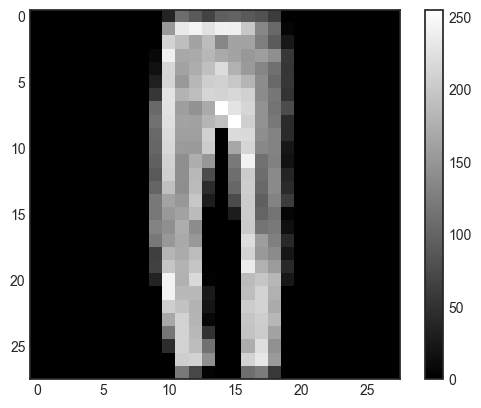

In [40]:
plt.figure()
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

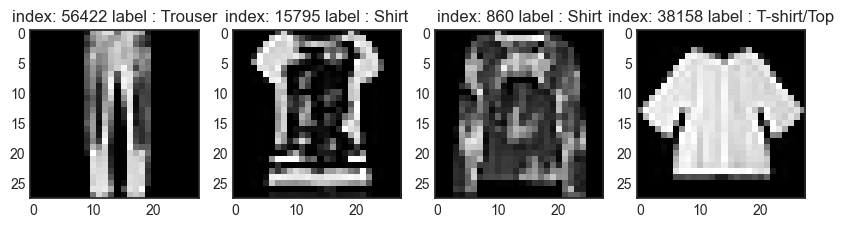

In [41]:
num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(10,10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx]
    label = y_train_full[idx]
    plt.subplot(1,len(random_idxs),i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'index: {idx} label : {class_names[label]}')
plt.show()

### 데이터 전처리

- Normalization
- Flatten
- loss='sparse_categorical_crossentropy'

In [42]:
# 데이터 전처리
# 1. 이미지 데이터를 1차원 배열로 변환 (Flatten)
# 2. 픽셀값을 0~1 사이로 정규화 (Normalization)
# - 원본 이미지의 픽셀값(0~255)을 255로 나누어 0~1 사이의 값으로 변환
# - 이는 모델의 학습을 안정화하고 성능을 향상시키는데 도움이 됨

x_train = (x_train.reshape(-1,28*28))/255.0
x_valid = (x_valid.reshape(-1,28*28))/255.0
x_test = (x_test.reshape(-1,28*28))/255.0

### 모델 구성 (함수형 API)

In [43]:
input = Input(shape=(784, ), name='input')
hidden1 = Dense(512, activation='relu', name='hidden1')(input)
hidden2 = Dense(256, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(128, activation='relu', name='hidden3')(hidden2)
hidden4 = Dense(64, activation='relu', name='hidden4')(hidden3)
hidden5 = Dense(32, activation='relu', name='hidden5')(hidden4)
output = Dense(10, activation='softmax', name='output')(hidden5)

model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 576,810 (2.20 MB)

 Trainable params: 576,810 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

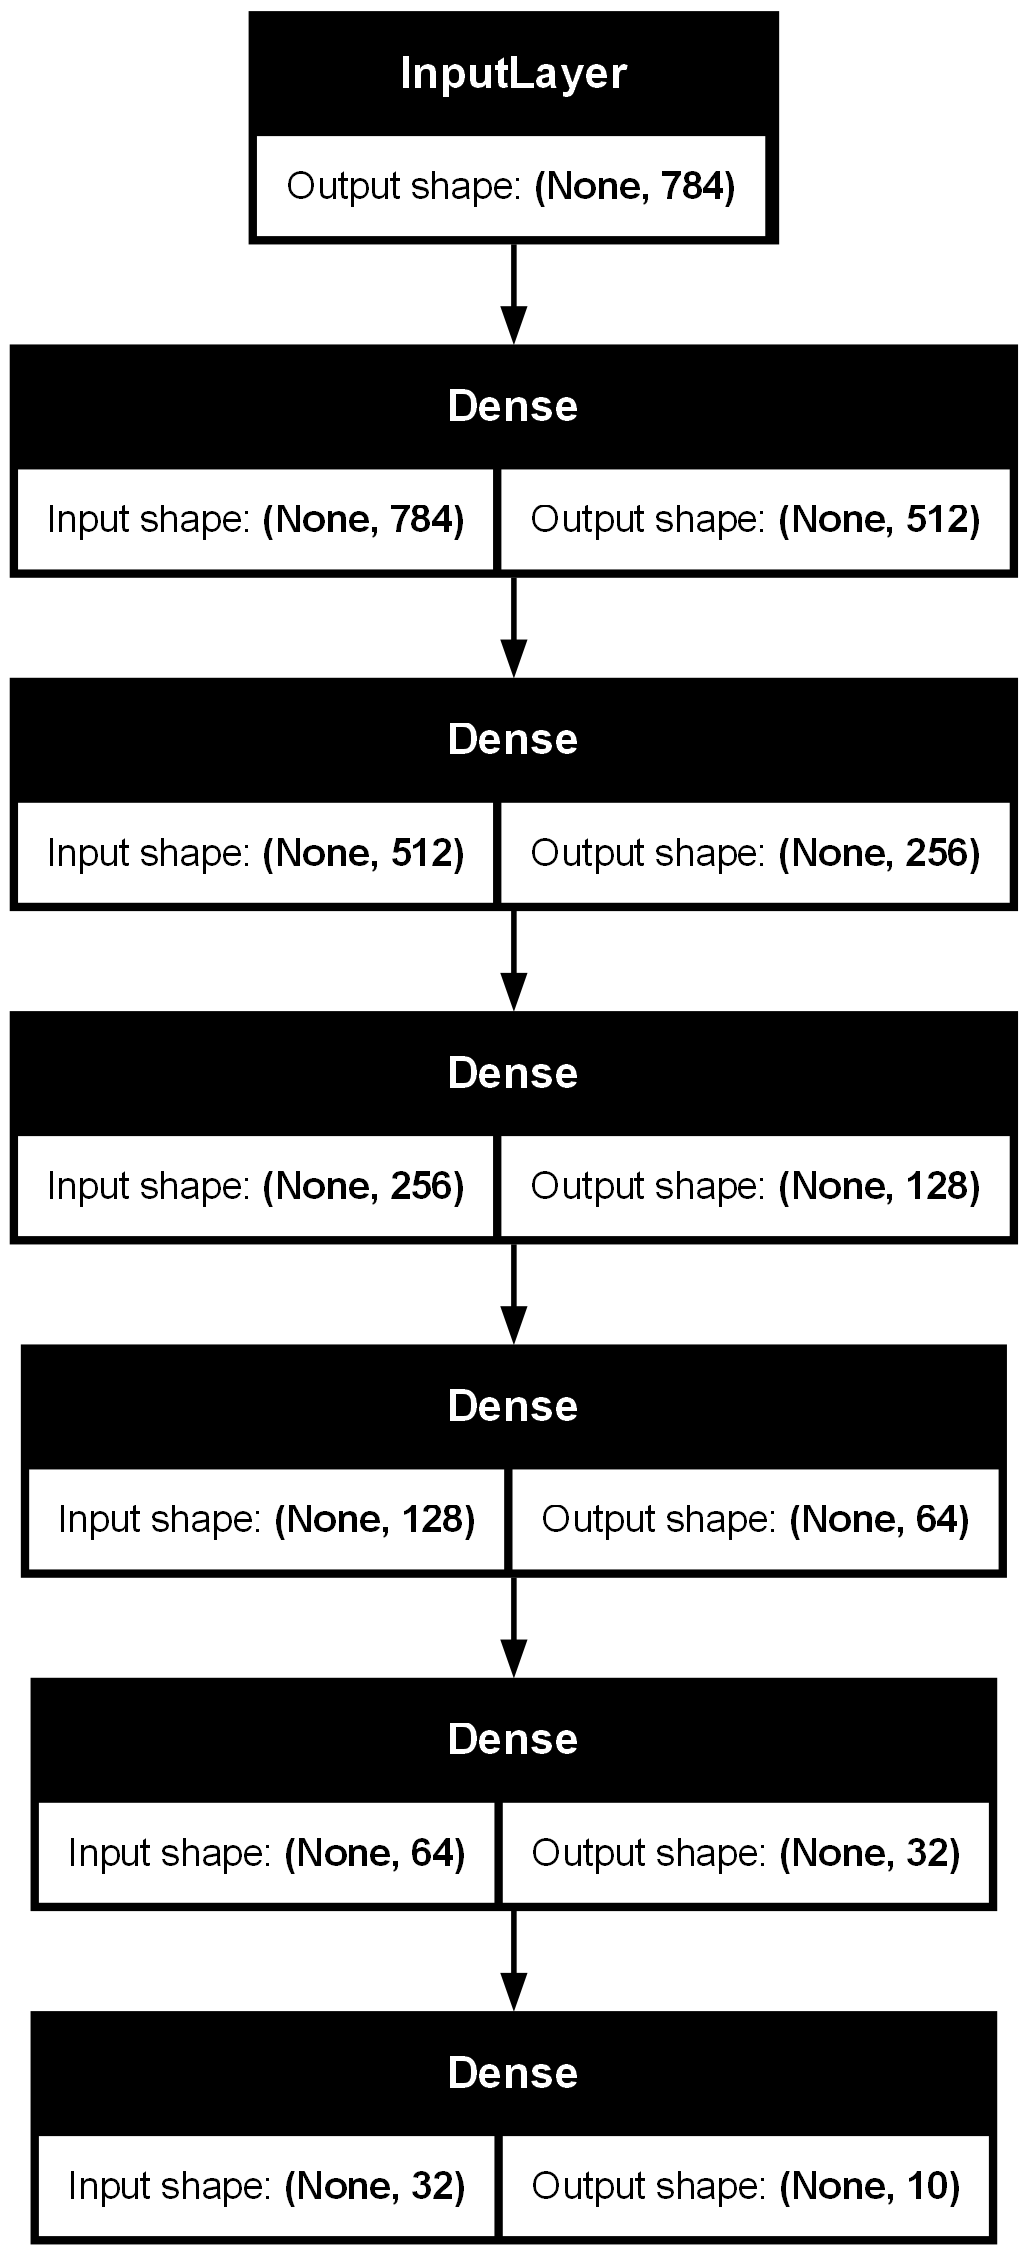

In [44]:
plot_model(model, show_shapes=True)

### 모델 컴파일 및 학습

In [45]:
model.compile(optimizer=Adam(learning_rate=0.01), #optimizer='adam'
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
history = model.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_valid, y_valid))

Epoch 1/30


c:\Users\rlaal\anaconda3\envs\py39\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input']. Received: the structure of inputs=*
  warnings.warn(


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3034 - loss: 1.9492 - val_accuracy: 0.7751 - val_loss: 0.6158
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7996 - loss: 0.5476 - val_accuracy: 0.8348 - val_loss: 0.4601
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8393 - loss: 0.4550 - val_accuracy: 0.8389 - val_loss: 0.4614
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8516 - loss: 0.4150 - val_accuracy: 0.8584 - val_loss: 0.4023
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8665 - loss: 0.3737 - val_accuracy: 0.8308 - val_loss: 0.4939
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8676 - loss: 0.3632 - val_accuracy: 0.8564 - val_loss: 0.4082
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8743 - loss: 0.3482 - val_accuracy: 0.8453 - val_loss: 0.4332
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8768 - loss: 0.3420 - val_accuracy: 0.8468 - val_loss: 0.4441
E

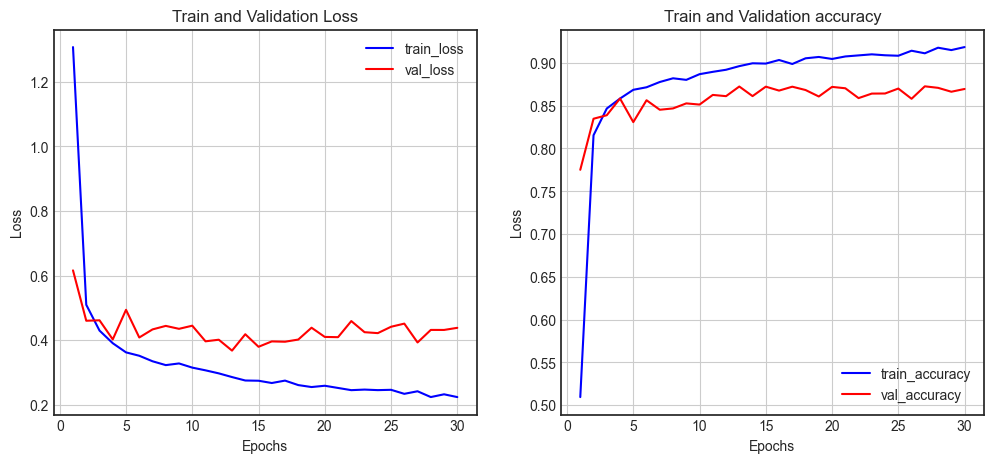

In [47]:
# 기록을 눈으로 보기 편하게 시각화

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1, 2, 1) # 행 / 열 / 위치
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')

ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()


accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')

ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

### 모델 평가 및 예측

In [48]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8624 - loss: 0.4657


[0.47670942544937134, 0.8607000112533569]

In [49]:
pred_y2 = model.predict(x_test)

print(pred_y2[0])
print(np.argmax(pred_y2[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7.7288782e-08 1.6886565e-08 5.5713816e-09 7.5809456e-09 1.1439542e-08
 3.1133941e-03 8.8125163e-10 3.7738454e-02 1.0476792e-08 9.5914805e-01]
9


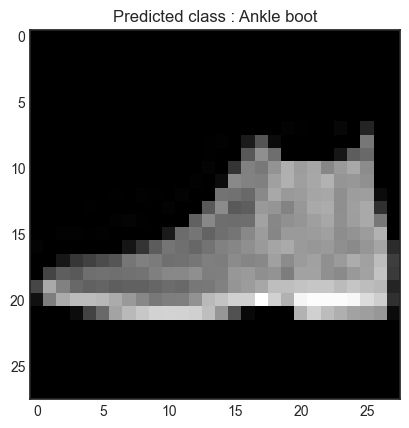

In [50]:
arg_pred_y = np.argmax(pred_y2, axis=1)
plt.imshow(x_test[0].reshape(-1,28), cmap='gray')
plt.title(f'Predicted class : {class_names[arg_pred_y[0]]}')
plt.show()

In [51]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(-1,28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f'{class_names[predicted_label]} / {class_names[true_label]}', color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    #thisplot = plt.bar(class_names, predictions_array, color="#777777", label=class_names)
    #plt.xticks(rotation=90)
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

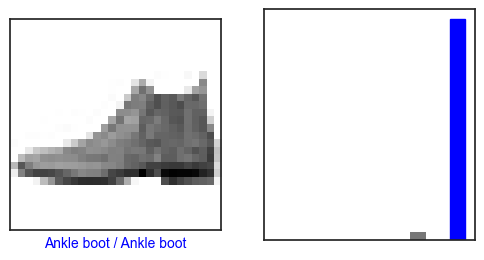

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_y2, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, pred_y2, y_test)
plt.show()

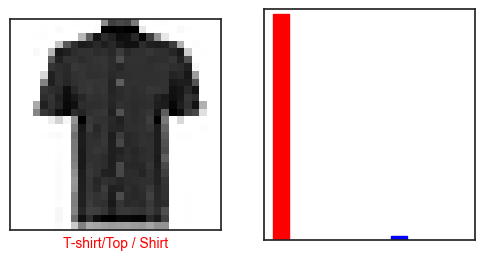

In [53]:
i = 40
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_y2, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, pred_y2, y_test)
plt.show()

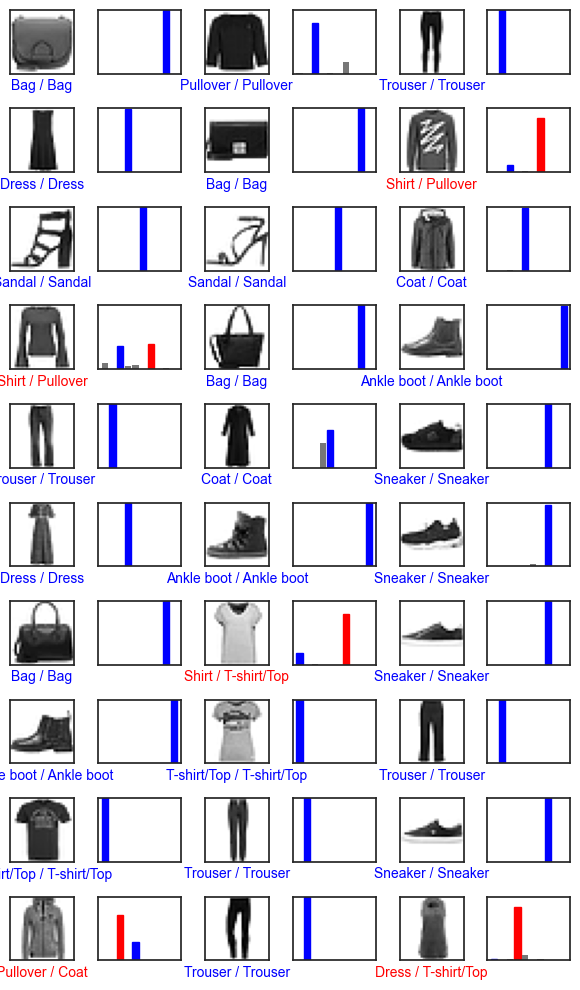

In [54]:
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2*num_cols, num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2*num_cols, 2*idx+1)
    plot_image(num, pred_y2, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*idx+2)
    plot_value_array(num, pred_y2, y_test)
plt.tight_layout()
plt.show()

- 혼동 행렬 (Confusion Matrix)

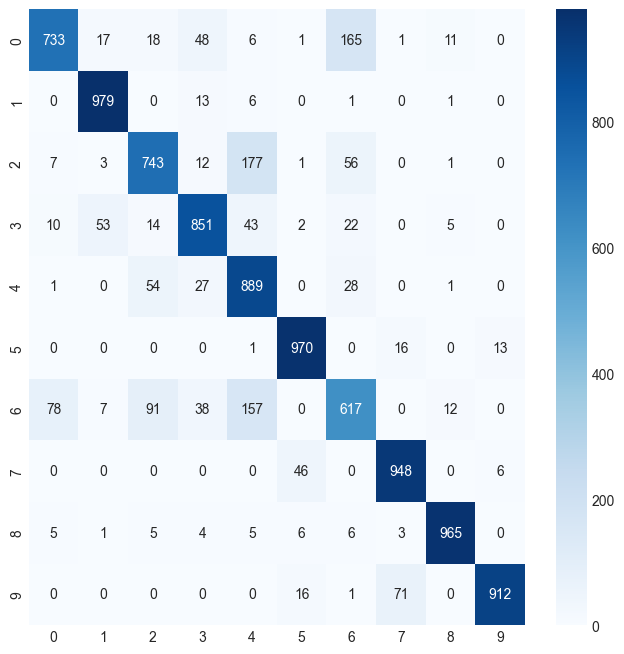

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.figure(figsize=(8,8))
cm = confusion_matrix(y_test, np.argmax(pred_y2, axis=1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show('True Label')
plt.show()

- 분류 보고서

In [56]:
print(classification_report(y_test, np.argmax(pred_y2, axis=1)))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1000
           1       0.92      0.98      0.95      1000
           2       0.80      0.74      0.77      1000
           3       0.86      0.85      0.85      1000
           4       0.69      0.89      0.78      1000
           5       0.93      0.97      0.95      1000
           6       0.69      0.62      0.65      1000
           7       0.91      0.95      0.93      1000
           8       0.97      0.96      0.97      1000
           9       0.98      0.91      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

